In [7]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, quad, simps
from scipy.optimize import fmin
import polimi.systems as systems
import polimi.envelope as envelope
from polimi.solvers import *
print('scipy version: ' + scipy.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
scipy version: 1.2.0


In [2]:
l = lambda t,i: t**i

In [8]:
def objective(alpha,t,y):
    p = map(lambda xnp.zero)
    y[0]-

IndentationError: expected an indented block (<ipython-input-8-8fd9dc66236d>, line 2)

In [3]:
T_guess = 0.9*2*np.pi
tend = 2*T_guess
time = np.linspace(0,tend,1001)
y0 = np.array([-0.5,0.2])
reltol = 1e-6
abstol = np.array([1e-8,1e-8])
epsilon = 0.001
sol = solve_ivp(lambda t,y: systems.vdp(t,y,epsilon,[0],[1]),[0,tend],y0,
                method='BDF',jac=lambda t,y: systems.vdp_jac(t,y,epsilon),
                events=systems.y1min,atol=abstol,rtol=reltol,t_eval=time)
y = sol['y'][0]

In [5]:
first = np.where(time<=T_guess)
second = np.where(time>=T_guess)
coeff = simps(y[second]-y[first],time[first])
k = 5
A = np.zeros((k,k))
b = np.zeros(k)
for j in range(k):
    for i in range(k):
        A[j][i] = quad(lambda t: (l(t+T_guess,i+1)-l(t,i+1))*(l(t+T_guess,j+1)-l(t,j+1)), 0, T_guess)[0]
    b[j] = coeff * quad(lambda t: l(t+T_guess,j+1)-l(t,j+1), 0, T_guess)[0]
alpha = np.matmul(np.linalg.inv(A),b)
r = np.zeros(time.shape)
for i in range(k):
    r += alpha[i] * l(time,i+1)

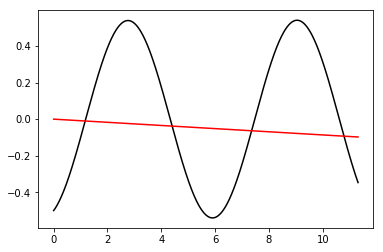

In [6]:
plt.plot(time,y,'k')
plt.plot(time,r,'r')
plt.show()

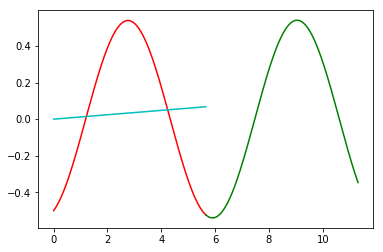

In [69]:
k = 1
alpha0 = np.zeros(k)
def fun(alpha,t,y):
    return simps((y - np.sum(np.array([a*t**(i+1) for i,a in enumerate(alpha)]),axis=0))**2,t)
#    return sum((y - np.sum(np.array([a*t**(i) for i,a in enumerate(alpha)]),axis=0))**2)
def fun2(alpha,t,y):
    return simps(
        (y[0] - np.sum(np.array([a*t[0]**(i) for i,a in enumerate(alpha)]),axis=0) -
        (y[1] - np.sum(np.array([a*t[1]**(i) for i,a in enumerate(alpha)]),axis=0)))**2,t[0])
alpha = fmin(fun, alpha0, args=(time[first],y[first]), disp=False)
#alpha = fmin(fun2, alpha0, args=([time[first],time[second]],[y[first],y[second]]), disp=True)
z = np.sum(np.array([a*time[first]**(i+1) for i,a in enumerate(alpha)]),axis=0)
#z = [np.sum(np.array([a*time[first]**(i) for i,a in enumerate(alpha)]),axis=0),
#     np.sum(np.array([a*time[second]**(i) for i,a in enumerate(alpha)]),axis=0)]
plt.plot(time[first],y[first],'r')
plt.plot(time[second],y[second],'g')
plt.plot(time[first],z,'c')
# plt.plot(time[first],z[0],'c')
# plt.plot(time[second],z[1],'m')
plt.show()